In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from joblib import dump, load
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df = pd.read_csv("fashion-mnist_test.csv")

In [8]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(10000, 785)

In [9]:
label_type = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [12]:
not_regularized_model = LogisticRegression(solver="sag", penalty=None, max_iter=10000)
l2_regularized_model = LogisticRegression(solver="sag", penalty='l2',  max_iter=10000)

In [11]:
X = df[df.columns[1:]]
Y = df['label']

In [13]:
def display_data(index: int):
    print("Actual label:", label_type[Y.loc[index]])
    plt.imshow(X.loc[index].values.reshape(28,28))

Actual label: Pullover


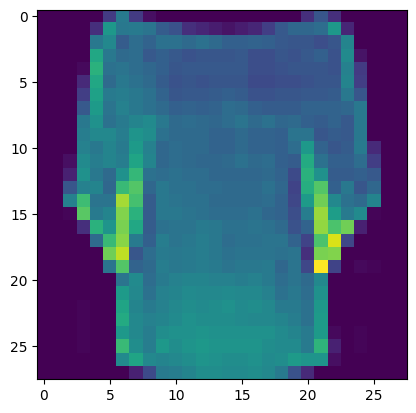

In [14]:
display_data(5)

In [15]:
X = X / 255.

In [16]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [17]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=1000)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=1000)

In [19]:
X_train.shape, Y_train.shape

((8000, 784), (8000,))

In [20]:
X_validate.shape, Y_validate.shape

((1000, 784), (1000,))

In [17]:
X_test.shape, Y_test.shape

((1000, 784), (1000,))

In [ ]:
not_regularized_estimator = not_regularized_model.fit(X_train, Y_train)

In [ ]:
dump(not_regularized_estimator, "not_regularized_estimator_8k.joblib")

In [31]:
sample_size = 10

Xsample = X[:sample_size]
Ysample = Y[:sample_size]

kf = KFold(n_splits=5)
kf.get_n_splits(Xsample)

5

In [32]:

for i, (train_index, test_index) in enumerate(kf.split(Xsample, Ysample)):
    print( "\t Particion #", i)

    print("Trining index: ", train_index)

    test_index, validation_index = train_test_split(test_index, test_size=0.5)

    print("Test_index splited: ", test_index)
    print("Validation_index splited: ", validation_index)

	 Particion # 0
Trining index:  [2 3 4 5 6 7 8 9]
Test_index splited:  [1]
Validation_index splited:  [0]
Test index:  [1]
	 Particion # 1
Trining index:  [0 1 4 5 6 7 8 9]
Test_index splited:  [2]
Validation_index splited:  [3]
Test index:  [2]
	 Particion # 2
Trining index:  [0 1 2 3 6 7 8 9]
Test_index splited:  [4]
Validation_index splited:  [5]
Test index:  [4]
	 Particion # 3
Trining index:  [0 1 2 3 4 5 8 9]
Test_index splited:  [6]
Validation_index splited:  [7]
Test index:  [6]
	 Particion # 4
Trining index:  [0 1 2 3 4 5 6 7]
Test_index splited:  [8]
Validation_index splited:  [9]
Test index:  [8]
